<a href="https://colab.research.google.com/github/telnarayanan/Pytorch-LearningProgress/blob/main/DL_BITS_CompVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DL dataset to BITS G drive
# Preserve same folder structure as BITs
  # Same folder structure for IP and OP
# EDA
# DL Algorithm as per Github - mrdbourke


# 0. Import Pytorch, Setup Device-Agnostic Code


In [1]:
import torch
from torch import nn
torch.__version__

'1.12.1+cu113'

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Get Data



1.   Get the files from Canvas Website
2.   Upload them to BITS - Google Drive.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Verify Data
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [4]:
!ls

drive  sample_data


In [5]:
from os import walk
for (dirpath, dirnames, filenames) in walk("/content/drive/My Drive/Data/XRay/"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
    print("File name: ", filenames)

Directory path:  /content/drive/My Drive/Data/XRay/
Folder name:  ['XRayExtract']
File name:  ['Train_Test_Image.zip']
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract
Folder name:  ['Test', 'Train']
File name:  []
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract/Test
Folder name:  ['COVID', 'non_COVID']
File name:  []
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID
Folder name:  []
File name:  ['COVID19(396).jpg', 'COVID19(410).jpg', 'COVID19(285).jpg', 'COVID19(337).jpg', 'COVID19(442).jpg', 'COVID19(164).jpg', 'COVID19(183).jpg', 'COVID-19 (745).jpg', 'COVID-19 (831).jpg', 'COVID-19 (865).jpg', 'COVID-19 (773).jpg', 'COVID19(463).jpg', 'COVID19(287).jpg', 'COVID19(419).jpg', 'COVID19(106).jpg', 'COVID-19 (709).jpg', 'COVID19(415).jpg', 'COVID19(499).jpg', 'COVID19(153).jpg', 'COVID19(63).jpg', 'COVID-19 (750).jpg', 'COVID19(210).jpg', 'COVID19(275).jpg', 'COVID19(324).jpg', 'COVID19(8).jpg', 'COVID19(100).jpg', 'COVID19(423).jpg'

In [ ]:
# If the files are NOT already unzipped, extract it again

#!unzip "/content/drive/My Drive/Data/XRay/Train_Test_Image.zip" -d "/content/drive/My Drive/Data/XRay/XRayExtract"

Archive:  /content/drive/My Drive/Data/XRay/Train_Test_Image.zip
   creating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (313).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (353).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (371).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (425).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (439).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (457).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (461).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (475).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (479).jpg  
  inflating: /content/drive/My Drive/Data/XRa

In [6]:
from os import walk
for (dirpath, dirnames, filenames) in walk("/content/drive/My Drive/Data/XRay/"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
    print("File name: ", filenames)

Directory path:  /content/drive/My Drive/Data/XRay/
Folder name:  ['XRayExtract']
File name:  ['Train_Test_Image.zip']
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract
Folder name:  ['Test', 'Train']
File name:  []
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract/Test
Folder name:  ['COVID', 'non_COVID']
File name:  []
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID
Folder name:  []
File name:  ['COVID19(396).jpg', 'COVID19(410).jpg', 'COVID19(285).jpg', 'COVID19(337).jpg', 'COVID19(442).jpg', 'COVID19(164).jpg', 'COVID19(183).jpg', 'COVID-19 (745).jpg', 'COVID-19 (831).jpg', 'COVID-19 (865).jpg', 'COVID-19 (773).jpg', 'COVID19(463).jpg', 'COVID19(287).jpg', 'COVID19(419).jpg', 'COVID19(106).jpg', 'COVID-19 (709).jpg', 'COVID19(415).jpg', 'COVID19(499).jpg', 'COVID19(153).jpg', 'COVID19(63).jpg', 'COVID-19 (750).jpg', 'COVID19(210).jpg', 'COVID19(275).jpg', 'COVID19(324).jpg', 'COVID19(8).jpg', 'COVID19(100).jpg', 'COVID19(423).jpg'

# 2. Data Preparation - Exploratory Data analysis Become one with the data (data prep)

In [7]:
"""
Map out the Folder Structure

/content/drive/My Drive/Data/Xray/XrayExtract/  <- Overall Dataset folder
    Train/                                      <- Training dataset folder
        COVID/                                  <- Class name COVID as folder name
            COVID-19(1).jpg
            COVID-19(10).jpg
            ...       
        non-COVID/                              <- Class name non-COVID as folder name
            NORMAL(0).jpg
            NORMAL(1).jpg
            NORMAL(100).jpg
            ...
    Test/                                       <- Testing dataset folder
        COVID/                                  <- Class name COVID as folder name
            COVID-19(313).jpg                   
            COVID-19(353).jpg   
            ...
        non-COVID/                              <- Class name non-COVID as folder name
            NORMAL(10).jpg
            NORMAL(1001).jpg            
            ...
"""
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [8]:
from pathlib import Path

# Setup path to data folder
data_path = Path("/content/drive/My Drive/Data/XRay")
image_path = data_path / "XRayExtract"
walk_through_dir(image_path)

There are 2 directories and 0 images in '/content/drive/My Drive/Data/XRay/XRayExtract'.
There are 2 directories and 0 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Test'.
There are 0 directories and 167 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID'.
There are 0 directories and 317 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Test/non_COVID'.
There are 2 directories and 0 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Train'.
There are 0 directories and 543 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Train/COVID'.
There are 0 directories and 1266 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Train/non_COVID'.


In [18]:
# Setup train and testing paths
train_dir = image_path / "Train"
test_dir = image_path / "Test"

train_dir, test_dir

(PosixPath('/content/drive/My Drive/Data/XRay/XRayExtract/Train'),
 PosixPath('/content/drive/My Drive/Data/XRay/XRayExtract/Test'))

Random image path: /content/drive/My Drive/Data/XRay/XRayExtract/Train/non_COVID/NORMAL(959).jpg
Image class: non_COVID
Image height: 1264
Image width: 1638


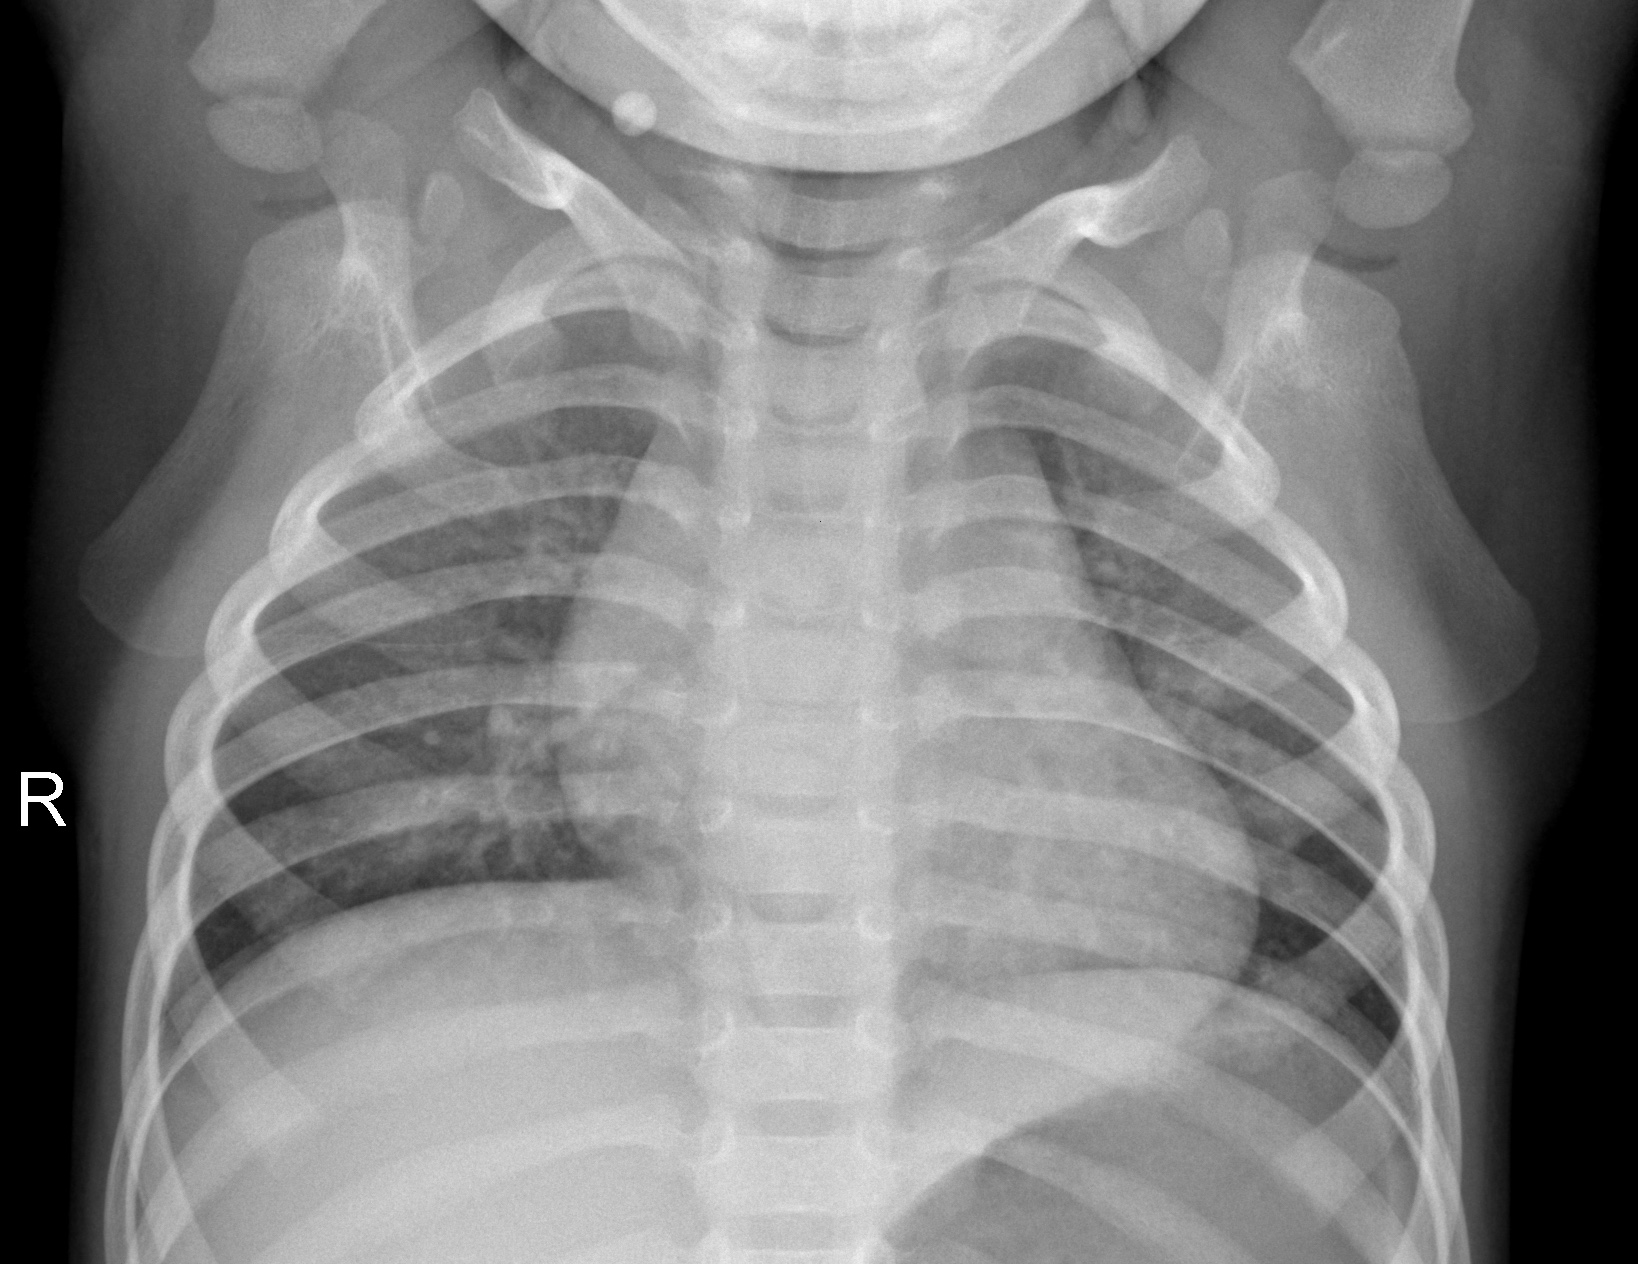

In [9]:
import random
from PIL import Image

# Set seed
# random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

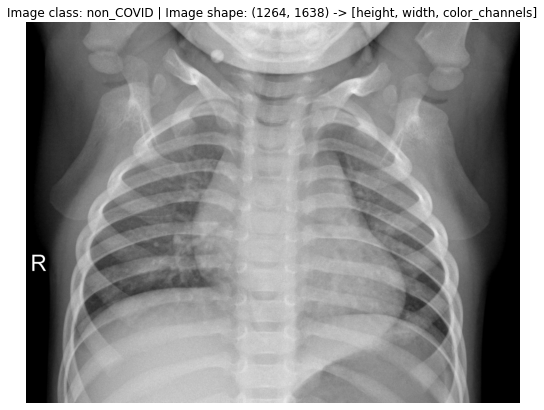

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array, cmap="gray")
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

# 3. Transforming Data

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [12]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor(), # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0,
    # transforms.Grayscale(1) # Adding grayscale 
])

In [13]:
image_paths = image_path_list
n = 3
random_image_paths = random.sample(image_paths, k=n)

In [ ]:
"""
print(image_path_list[0])
print(random_image_paths[2])
transform = data_transform
f = Image.open(random_image_paths[0])
#f
fig, ax = plt.subplots(1, 2)
ax[0].imshow(f)
ax[0].set_title(f"Original Size : {f.size}")
ax[0].axis="off"
transformed_image = transform(f).permute(1, 2, 0)
#ax[1].imshow(transformed_image) 
ax[1].set_title(f"Transformed Size :{transformed_image.shape}") 
ax[1].axis("off")
"""


'\nprint(image_path_list[0])\nprint(random_image_paths[2])\ntransform = data_transform\nf = Image.open(random_image_paths[0])\n#f\nfig, ax = plt.subplots(1, 2)\nax[0].imshow(f)\nax[0].set_title(f"Original Size : {f.size}")\nax[0].axis="off"\ntransformed_image = transform(f).permute(1, 2, 0)\n#ax[1].imshow(transformed_image) \nax[1].set_title(f"Transformed Size :{transformed_image.shape}") \nax[1].axis("off")\n'

In [ ]:
transformed_image.shape

NameError: ignored

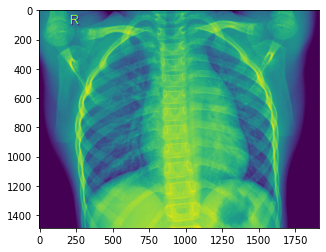

In [14]:
plt.imshow(Image.open(random_image_paths[0]))

In [15]:
print(transformed_image.squeeze().shape)
plt.imshow(transformed_image.squeeze())

NameError: ignored

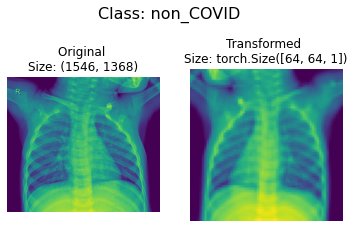

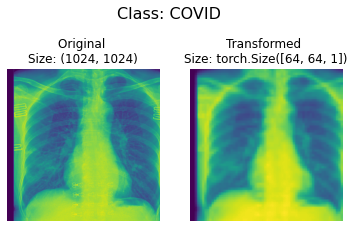

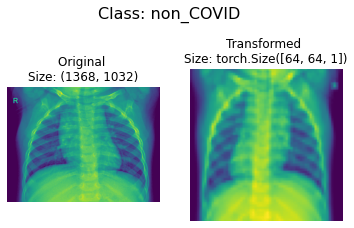

In [16]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image.squeeze()) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

# 4. Loading data with ImageFolder

In [19]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 1809
    Root location: /content/drive/My Drive/Data/XRay/XRayExtract/Train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 484
    Root location: /content/drive/My Drive/Data/XRay/XRayExtract/Test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [20]:
# Get class names as a list
class_names = train_data.classes
class_names

['COVID', 'non_COVID']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'COVID': 0, 'non_COVID': 1}

In [21]:
# Check the lengths
len(train_data), len(test_data)

(1809, 484)

In [22]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.6353, 0.7176, 0.7804,  ..., 0.8627, 0.8667, 0.8863],
         [0.6431, 0.7373, 0.7843,  ..., 0.8745, 0.8745, 0.8784],
         [0.6627, 0.7569, 0.8039,  ..., 0.8824, 0.8784, 0.8667]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.6353, 0.7176, 0.7804,  ..., 0.8627, 0.8667, 0.8863],
         [0.6431, 0.7373, 0.7843,  ..., 0.8745, 0.8745, 0.8784],
         [0.6627, 0.7569, 0.8039,  ..., 0.8824, 0.8784, 0.8667]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.00

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


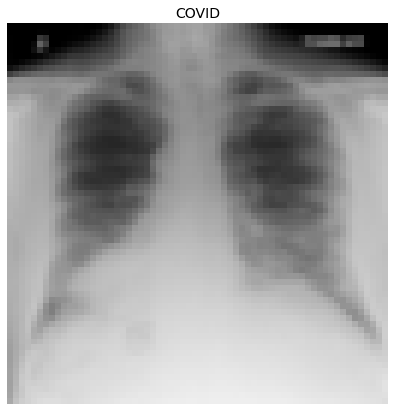

In [23]:

# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [24]:

# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f61a0793550>,
 <torch.utils.data.dataloader.DataLoader at 0x7f61a0793310>)

In [25]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# 5. Loading image data with a custom DataSet

# 6. Other forms of transforms

In [26]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

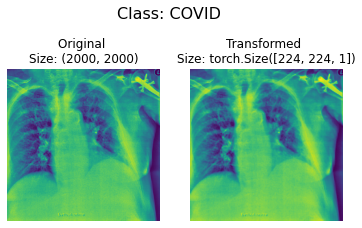

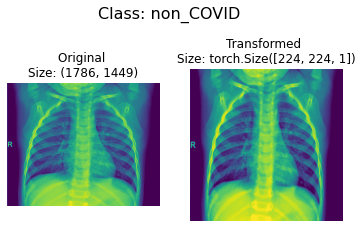

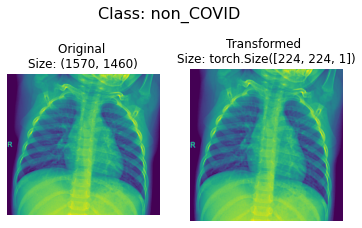

In [27]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

# 7. Model 9. TinyVGG - without data augmentation

In [28]:
# Create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [29]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7f61a0ad1250>,
 <torch.utils.data.dataloader.DataLoader at 0x7f619fd8dbd0>)

In [32]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

In [33]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0498, 0.0530]], device='cuda:0')

Output prediction probabilities:
tensor([[0.4992, 0.5008]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
0


In [34]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 2]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [35]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [36]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [37]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [38]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5884 | train_acc: 0.7016 | test_loss: 0.3963 | test_acc: 0.7754
Epoch: 2 | train_loss: 0.1587 | train_acc: 0.9459 | test_loss: 0.2181 | test_acc: 0.9492
Epoch: 3 | train_loss: 0.0945 | train_acc: 0.9682 | test_loss: 0.1449 | test_acc: 0.9492
Epoch: 4 | train_loss: 0.0866 | train_acc: 0.9682 | test_loss: 0.1557 | test_acc: 0.9590
Epoch: 5 | train_loss: 0.0694 | train_acc: 0.9775 | test_loss: 0.1329 | test_acc: 0.9668
Total training time: 555.417 seconds


#8. Exploring Loss Curves

In [39]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [40]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

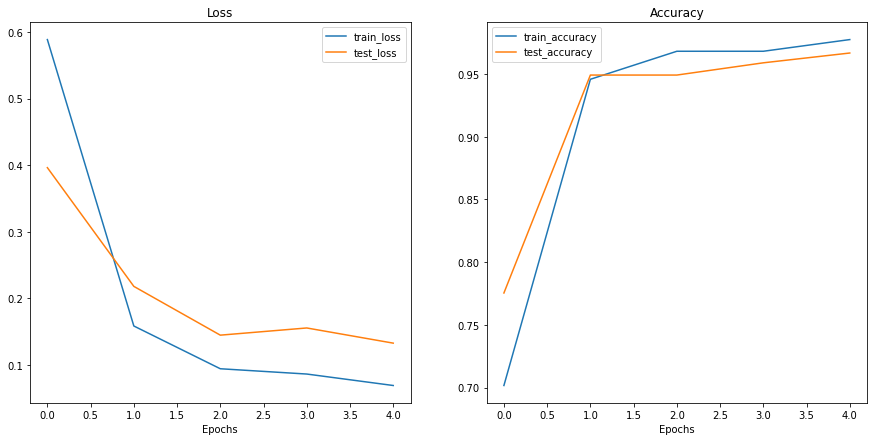

In [41]:
plot_loss_curves(model_0_results)

# 9. Model 1: Tiny VGG - with data augmentation

In [42]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [43]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 1809
     Root location: /content/drive/My Drive/Data/XRay/XRayExtract/Train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 484
     Root location: /content/drive/My Drive/Data/XRay/XRayExtract/Test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

In [44]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f6198138510>,
 <torch.utils.data.dataloader.DataLoader at 0x7f61a0793310>)

In [45]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

In [46]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6063 | train_acc: 0.7015 | test_loss: 0.5115 | test_acc: 0.6738
Epoch: 2 | train_loss: 0.3842 | train_acc: 0.8224 | test_loss: 0.2098 | test_acc: 0.9238
Epoch: 3 | train_loss: 0.3211 | train_acc: 0.8609 | test_loss: 0.1916 | test_acc: 0.9336
Epoch: 4 | train_loss: 0.3105 | train_acc: 0.8632 | test_loss: 0.2029 | test_acc: 0.9219
Epoch: 5 | train_loss: 0.2986 | train_acc: 0.8647 | test_loss: 0.1830 | test_acc: 0.9277
Total training time: 294.182 seconds


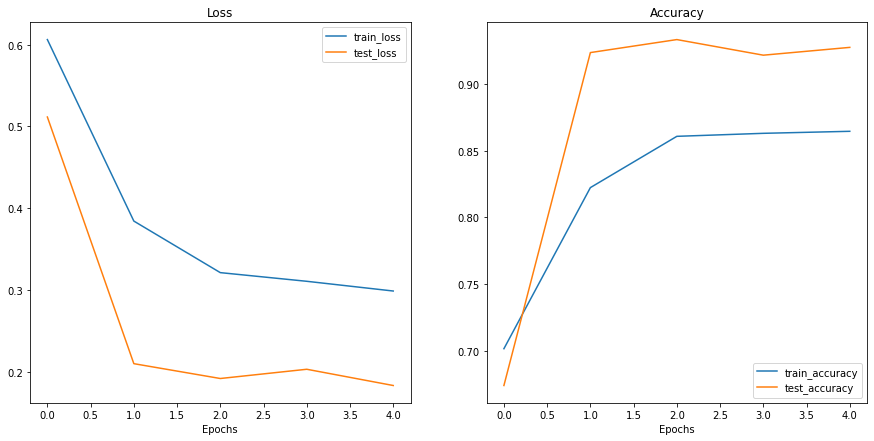

In [47]:
plot_loss_curves(model_1_results)

#10. Compare Model Results

In [48]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,0.588439,0.701593,0.396264,0.775391
1,0.158654,0.945853,0.218108,0.949219
2,0.094506,0.968202,0.144916,0.949219
3,0.086566,0.968202,0.155698,0.958984
4,0.069366,0.977522,0.132935,0.966797


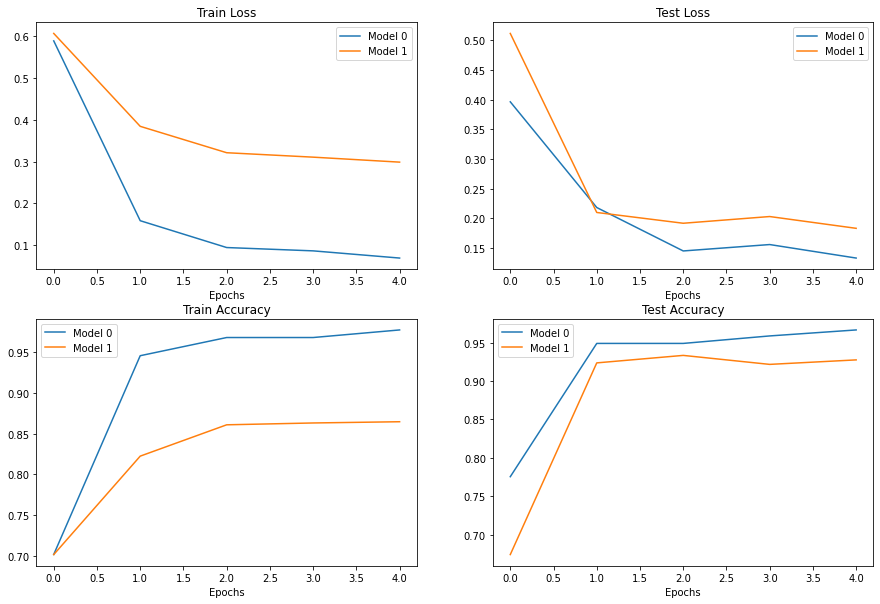

In [49]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

#11. Making a prediction on a custom image


In [ ]:
# Upload the images in the folder
# /data/CustomImageTest/

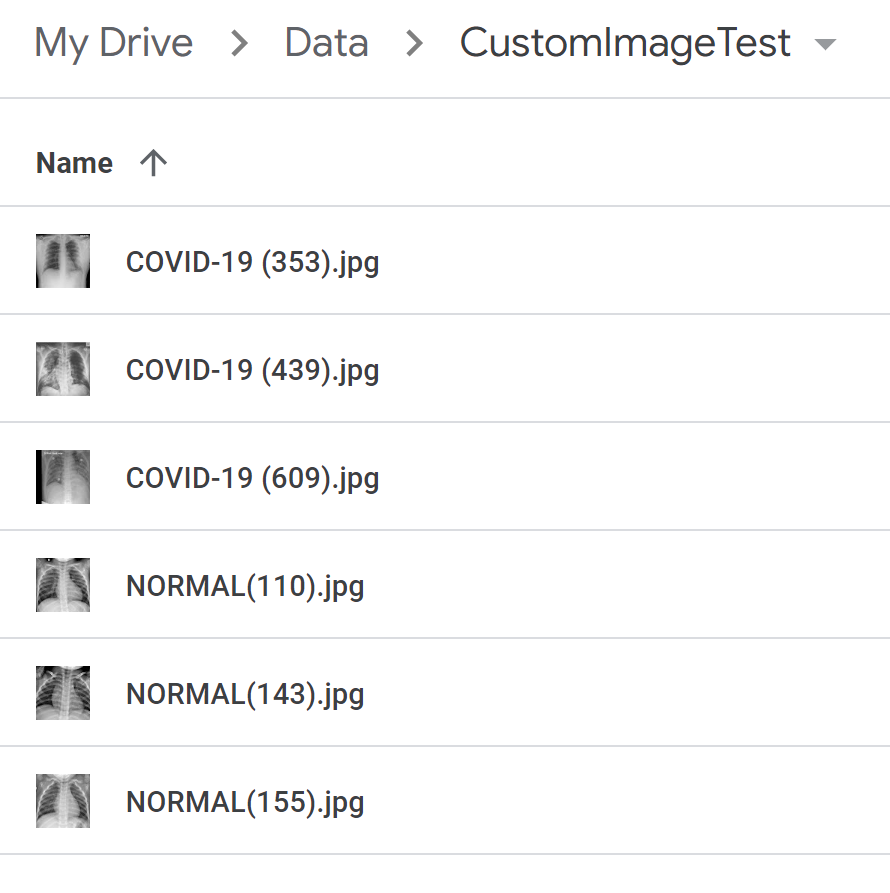

In [51]:
# setup custom image path

#custom_image_path = '/content/drive/My Drive/Data/CustomImageTest/NORMAL(110).jpg'
#custom_image_path = '/content/drive/My Drive/Data/CustomImageTest/NORMAL(143).jpg'
custom_image_path = '/content/drive/My Drive/Data/CustomImageTest/NORMAL(155).jpg'
#custom_image_path = '/content/drive/My Drive/Data/CustomImageTest/COVID-19 (353).jpg'
#custom_image_path = '/content/drive/My Drive/Data/CustomImageTest/COVID-19 (439).jpg'
#custom_image_path = '/content/drive/My Drive/Data/CustomImageTest/COVID-19 (609).jpg'






In [52]:
!ls

drive  sample_data


In [53]:
from os import walk
for (dirpath, dirnames, filenames) in walk("/content/drive/My Drive/Data/CustomImageTest/"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
    print("File name: ", filenames)

Directory path:  /content/drive/My Drive/Data/CustomImageTest/
Folder name:  []
File name:  ['COVID-19 (353).jpg', 'COVID-19 (439).jpg', 'COVID-19 (609).jpg', 'NORMAL(110).jpg', 'NORMAL(143).jpg', 'NORMAL(155).jpg']


In [54]:
from torchvision import io

mode = io.image.ImageReadMode.RGB
# Read in custom image
custom_image_uint8 = io.read_image(str(custom_image_path),mode)


# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")


Custom image tensor:
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 2, 3, 3],
         [0, 0, 0,  ..., 2, 2, 1],
         [0, 0, 0,  ..., 2, 2, 1]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 2, 3, 3],
         [0, 0, 0,  ..., 2, 2, 1],
         [0, 0, 0,  ..., 2, 2, 1]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 2, 3, 3],
         [0, 0, 0,  ..., 2, 2, 1],
         [0, 0, 0,  ..., 2, 2, 1]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 1306, 1720])

Custom image dtype: torch.uint8


In [ ]:
# convert it to the same format that the our model is trained on

In [56]:
import torchvision

# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path),mode).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0118, 0.0118],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0118, 0.0118],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..

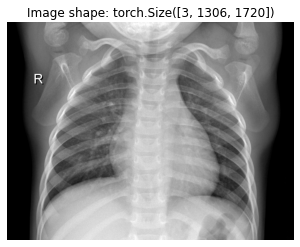

In [57]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0).squeeze()) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
#plt.imshow(custom_image)
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [58]:
print(f"custom image squeeze")
print(custom_image)
print(custom_image.squeeze())

custom image squeeze
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0118, 0.0118],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0118, 0.0118],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..

In [59]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    # transforms.Grayscale(1)
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")
print(f"Squeeze: {custom_image_transformed.squeeze()}")

print(f"Squeezed shape: {custom_image_transformed.squeeze().shape}")
print(f"UnSqueezed shape: {custom_image_transformed.unsqueeze(dim=0).shape}")

Original shape: torch.Size([3, 1306, 1720])
New shape: torch.Size([3, 64, 64])
Squeeze: tensor([[[0.0000, 0.0000, 0.0745,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0654,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0405,  ..., 0.0068, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0047, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0038, 0.0006],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0025]],

        [[0.0000, 0.0000, 0.0745,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0654,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0405,  ..., 0.0068, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0047, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0038, 0.0006],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0025]],

        [[0.0000, 0.0000, 0.0745,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0654,  

In [60]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: ignored

In [61]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [62]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-2.8514,  2.7662]], device='cuda:0')
Prediction probabilities: tensor([[0.0036, 0.9964]], device='cuda:0')
Prediction label: tensor([1], device='cuda:0')


In [63]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'non_COVID'

In [64]:
custom_image_pred_probs

tensor([[0.0036, 0.9964]], device='cuda:0')

In [65]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    mode = io.image.ImageReadMode.RGB
    target_image = torchvision.io.read_image(str(image_path),mode).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

In [82]:
# setup custom image path

#custom_image_path2 = '/content/drive/My Drive/Data/CustomImageTest/NORMAL(110).jpg'
#custom_image_path2 = '/content/drive/My Drive/Data/CustomImageTest/NORMAL(143).jpg'
#custom_image_path2 = '/content/drive/My Drive/Data/CustomImageTest/NORMAL(155).jpg'
custom_image_path2 = '/content/drive/My Drive/Data/CustomImageTest/COVID-19 (353).jpg'
#custom_image_path2 = '/content/drive/My Drive/Data/CustomImageTest/COVID-19 (439).jpg'
#custom_image_path2 = '/content/drive/My Drive/Data/CustomImageTest/COVID-19 (609).jpg'

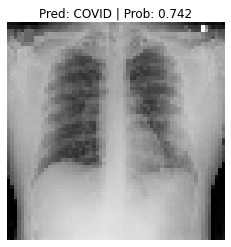

In [83]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path2,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)


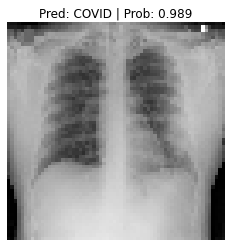

In [84]:
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path2,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

# 12. Export the two Model's state dict to Models folder in Google Drive


In [87]:
# Print model_0's state_dict
print("Model's state_dict:")
for param_tensor in model_0.state_dict():
    print(param_tensor, "\t", model_0.state_dict()[param_tensor].size(),"\t")

Model's state_dict:
conv_block_1.0.weight 	 torch.Size([10, 3, 3, 3]) 	
conv_block_1.0.bias 	 torch.Size([10]) 	
conv_block_1.2.weight 	 torch.Size([10, 10, 3, 3]) 	
conv_block_1.2.bias 	 torch.Size([10]) 	
conv_block_2.0.weight 	 torch.Size([10, 10, 3, 3]) 	
conv_block_2.0.bias 	 torch.Size([10]) 	
conv_block_2.2.weight 	 torch.Size([10, 10, 3, 3]) 	
conv_block_2.2.bias 	 torch.Size([10]) 	
classifier.1.weight 	 torch.Size([2, 2560]) 	
classifier.1.bias 	 torch.Size([2]) 	


In [88]:
!ls

drive  sample_data


In [ ]:
# save the model in the following folder
# /content/drive/My Drive/Models/BITS-XrayDetection

In [90]:
PATH = '/content/drive/My Drive/Models/BITS-XrayDetection/TinyVGG_model0.pth'

torch.save(model_0.state_dict(),PATH)

In [91]:
PATH = '/content/drive/My Drive/Models/BITS-XrayDetection/TinyVGG_model1.pth'

torch.save(model_1.state_dict(),PATH)